In [1]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt

#### 3.1. Load Dataset for Outlier Analysis

We load the cleaned dataset from the previous step to analyze numerical features and identify potential outliers.
This prepares the data for exploratory analysis and visualization.

In [2]:
df = pd.read_parquet("./data/2/df.parquet")

#### 3.2. Outlier Detection using IQR Method

We focus on numeric columns with more than 5 unique values, as these are suitable for outlier detection. 
Categorical or binary columns are excluded from this analysis.

Outliers are detected using the Interquartile Range (IQR) method:
- Values below Q1 - 3 * IQR or above Q3 + 3 * IQR are considered outliers
- Q1: 25th percentile, Q3: 75th percentile

We also calculate and display the number of outliers per numeric column.
This helps us understand which features have extreme values and the magnitude of these outliers.

In [3]:
numeric_columns = [col for col in df.select_dtypes("number").columns if df[col].nunique() > 5]

outliers = {col: df[(df[col] < df[col].quantile(0.25) - 3*(df[col].quantile(0.75)-df[col].quantile(0.25))) |
                         (df[col] > df[col].quantile(0.75) + 3*(df[col].quantile(0.75)-df[col].quantile(0.25)))][col]
            for col in numeric_columns}

for col, out in outliers.items():
    print(f"{col} : {len(out):,}/{df.shape[0]:,} outliers")

step : 0/21,000,000 outliers
amount : 528,790/21,000,000 outliers
oldbalanceOrg : 1,375,167/21,000,000 outliers
newbalanceOrig : 854,573/21,000,000 outliers
oldbalanceDest : 409,307/21,000,000 outliers
newbalanceDest : 2,643,583/21,000,000 outliers


#### 3.3. Visualize Outliers with Boxplots

Boxplots are plotted for all numeric columns to visually inspect the distribution and identify extreme values. 
- Each boxplot shows the median, quartiles, and extreme values.
- This visualization confirms that extreme values exist, but they are expected and meaningful.

Important observations:
- Extreme values reflect high-value transactions or accounts with large balances, not errors.
- The dataset is fully synthetic, so there are no data entry mistakes or inconsistencies.
- Features like "amount", "oldbalanceOrg", and "newbalanceOrig" contain outliers, which are realistic and should not be removed to avoid losing valuable information.

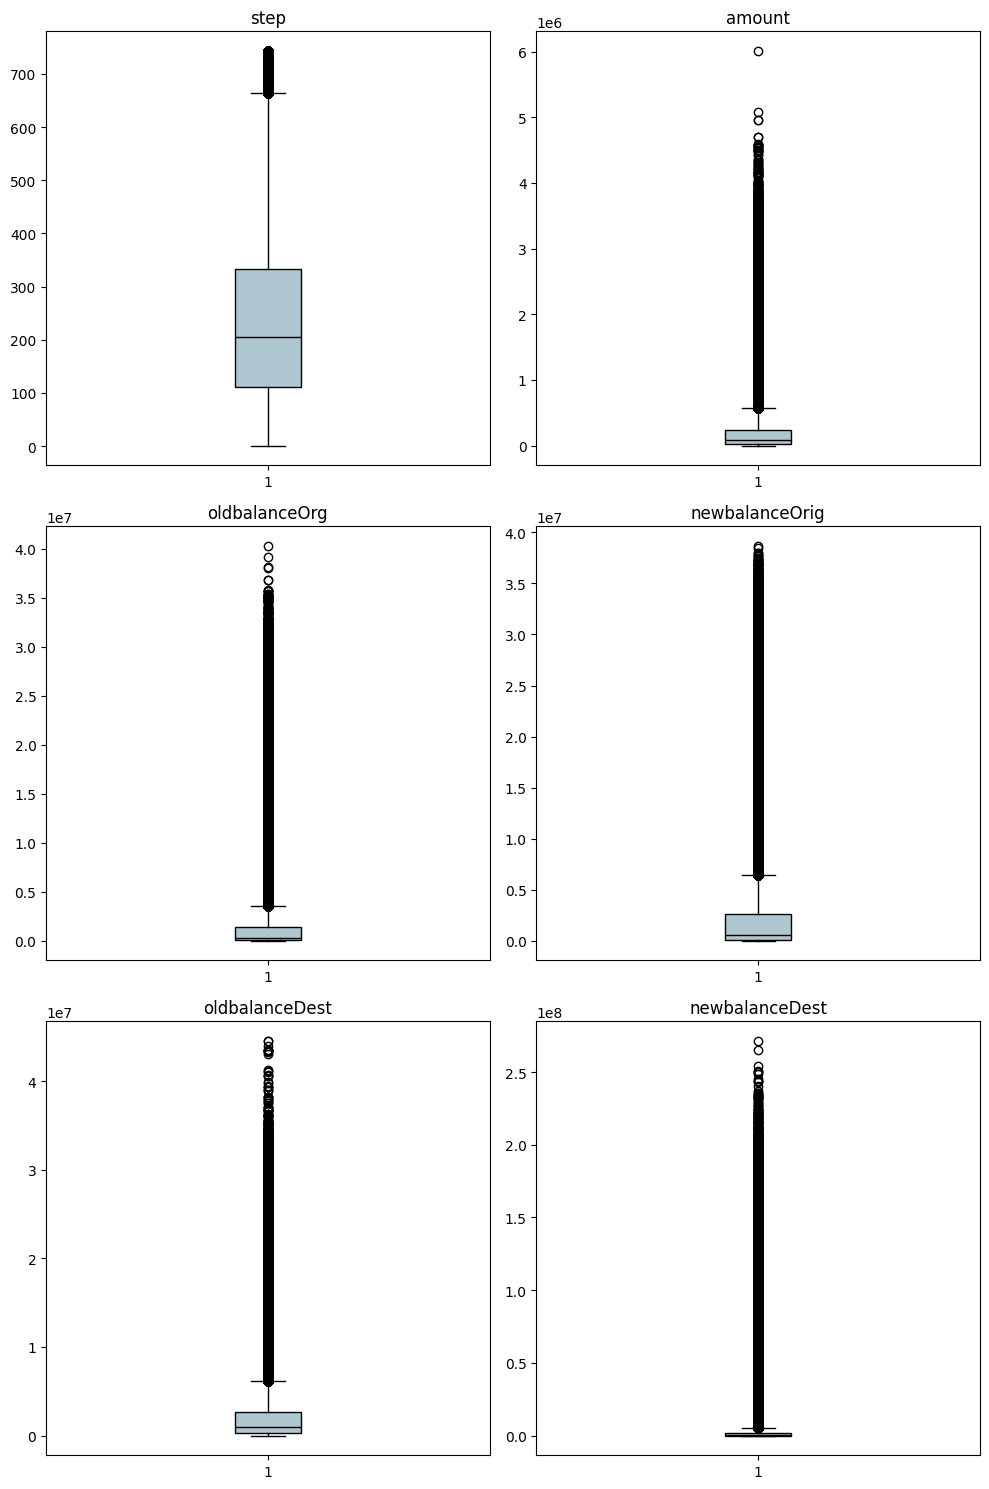

In [4]:
n_cols = 2
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].boxplot(df[col],
                    patch_artist=True,
                    boxprops=dict(facecolor="#AEC6CF", color="black"),
                    medianprops=dict(color="black", linewidth=1),
                    whiskerprops=dict(color="black"),
                    capprops=dict(color="black"))
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### 3.4. Save Dataset After Outlier Inspection

After verifying the dataset, we save it again.
- No rows were removed, as all extreme values are valid for modeling.
- This ensures we preserve a full synthetic dataset for future analysis or modeling.

In [5]:
os.makedirs("./data/3/", exist_ok=True)
df.to_parquet("./data/3/df.parquet", index=False)